I have to work with a dataset in the file full group.csv (more details about the data https://www.kaggle.com/imdevskp/corona-virus-report?select=full_grouped.csv).  

• Use either the original date column or the new year-month-day columns to determine what is the earliest and latest date that appears in the dataset.

• Select the data for the month April. What is the total number of deaths in this month?

• Create a new dataframe with the two columns CountryRegion and WHO Region. Remove the duplicates so that each combination of CountryRegion and WHO Region appears only once. What is the number of different CountryRegion that appears in the dataset? Which WHO Region has the most CountryRegion associated to it?

• Select the data for the months March and April, and for the country US. Was the average number of daily new deaths higher in March or April in US?

In [1]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
%matplotlib inline
!pip install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
df1= pd.read_csv('full_group.csv')
df1

,Date,CountryRegion,Confirmed,Deaths,Recovered,Active,New_cases,New_deaths,New_recovered,WHO_Region,year,month,day
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,2020,1,22
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,2020,1,22
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,2020,1,22
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe,2020,1,22
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,2020,1,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35151,2020-07-27,West Bank and Gaza,10621,78,3752,6791,152,2,0,Eastern Mediterranean,2020,7,27
35152,2020-07-27,Western Sahara,10,1,8,1,0,0,0,Africa,2020,7,27
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean,2020,7,27
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa,2020,7,27


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35156 entries, 0 to 35155
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           35156 non-null  object
 1   CountryRegion  35156 non-null  object
 2   Confirmed      35156 non-null  int64 
 3   Deaths         35156 non-null  int64 
 4   Recovered      35156 non-null  int64 
 5   Active         35156 non-null  int64 
 6   New_cases      35156 non-null  int64 
 7   New_deaths     35156 non-null  int64 
 8   New_recovered  35156 non-null  int64 
 9   WHO_Region     35156 non-null  object
 10  year           35156 non-null  int64 
 11  month          35156 non-null  int64 
 12  day            35156 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 3.5+ MB


# Use either the original date column or the new year-month-day columns to determine what is the earliest and latest date that appears in the dataset.

In [4]:
# Finding the Earliest date and Latest date in the dataset by using the original Date column
earliestdate=df1.Date.min()
print('Earliest date in the data set is:', earliestdate)

latestdate= df1.Date.max()
print('Latest date in the dataset is:', latestdate)

Earliest date in the data set is: 2020-01-22
Latest date in the dataset is: 2020-07-27


In [5]:
#Finding the earliest and latest date by using the new year-month-day columns
# I create new DataFrame with year, month, day
year_month_day=pd.to_datetime(df1[['year','month', 'day']])

#year_month_day
year_month_day= pd.DataFrame(year_month_day, columns=['Datetime'])
year_month_day
# The earliest date is:
print('The earliest date is:', year_month_day['Datetime'].min())

# The latest date is
print('The latest date is:', year_month_day.Datetime.max())


The earliest date is: 2020-01-22 00:00:00
The latest date is: 2020-07-27 00:00:00


#  Select the data for the month April. What is the total number of deaths in this month?

In [6]:
# We find out the datasets for April only
dataset_in_april= df1[df1.month==4]
dataset_in_april

,Date,CountryRegion,Confirmed,Deaths,Recovered,Active,New_cases,New_deaths,New_recovered,WHO_Region,year,month,day
13090,2020-04-01,Afghanistan,237,4,5,228,63,0,0,Eastern Mediterranean,2020,4,1
13091,2020-04-01,Albania,259,15,67,177,16,0,15,Europe,2020,4,1
13092,2020-04-01,Algeria,847,58,61,728,131,14,15,Africa,2020,4,1
13093,2020-04-01,Andorra,390,14,10,366,14,2,0,Europe,2020,4,1
13094,2020-04-01,Angola,8,2,1,5,1,0,0,Africa,2020,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18695,2020-04-30,West Bank and Gaza,344,2,76,266,0,0,5,Eastern Mediterranean,2020,4,30
18696,2020-04-30,Western Sahara,6,0,5,1,0,0,0,Africa,2020,4,30
18697,2020-04-30,Yemen,6,2,1,3,0,2,0,Eastern Mediterranean,2020,4,30
18698,2020-04-30,Zambia,106,3,55,48,9,0,1,Africa,2020,4,30


In [7]:
#What is the total number of deaths in this month (April)?

total_death_in_april= dataset_in_april.Deaths.sum()

print('The total deaths in April is: ', total_death_in_april)

The total deaths in April is:  4311214


Create a new dataframe with the two columns CountryRegion and WHO Region. Remove the duplicates so that each combination of CountryRegion and WHO Region appears only once. What is the number of different CountryRegion that appears in the dataset? Which WHO Region has the most CountryRegion associated to it?

In [8]:
#Create a new dataframe with the two columns CountryRegion and WHO Region. 
new_dataframe= df1[['CountryRegion', 'WHO_Region']]
new_dataframe.drop_duplicates()
new_dataframe.CountryRegion.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland',
       'Grenada', 'Guatemala', 'Guinea', 'G

Which WHO Region has the most CountryRegion associated to it?

In [9]:
#Which WHO Region has the most CountryRegion associated to it?
# I count the Countries associated with WHO_Region
Region_with_the_most_country=pd.DataFrame(df1.WHO_Region.value_counts())
Region_with_the_most_country

,WHO_Region
Europe,10528
Africa,9024
Americas,6580
Eastern Mediterranean,4136
Western Pacific,3008
South-East Asia,1880


In [10]:
# WHO Region has the most Country Region associated to it
Region_with_the_most_country.max()
#So, the WHO_Region has the most Country Region associated to it
Region_with_the_most_country.loc[Region_with_the_most_country.isin([Region_with_the_most_country.max()]).any(axis=1)]

,WHO_Region
Europe,10528


Select the data for the months March and April, and for the country US. Was the average number of daily new deaths higher in March or April in US?

In [11]:
# First, I sort out the data base on CountryRegion: US
data_in_US=df1[df1.CountryRegion== 'US']
data_in_US

# Select the data in US in March only
US_in_March=data_in_US[data_in_US.month==3]

# Find the average of US new deaths in March only
avg_new_deaths_in_March= US_in_March['New_deaths'].mean()
print('Average of new deaths in US in March is: ', avg_new_deaths_in_March)

# Select the data in US in April only
US_in_April= data_in_US[data_in_US.month==4]
# Find the average of new deaths in US in April only
avg_new_deaths_in_April= US_in_April.New_deaths.mean()
print('Average of new deaths in US in April is:', avg_new_deaths_in_April)

pd.concat([US_in_March, US_in_April])



Average of new deaths in US in March is:  180.7741935483871
Average of new deaths in US in April is: 1955.0333333333333


,Date,CountryRegion,Confirmed,Deaths,Recovered,Active,New_cases,New_deaths,New_recovered,WHO_Region,year,month,day
7466,2020-03-01,US,30,1,7,22,6,0,0,Americas,2020,3,1
7653,2020-03-02,US,53,6,7,40,23,5,0,Americas,2020,3,2
7840,2020-03-03,US,73,7,7,59,20,1,0,Americas,2020,3,3
8027,2020-03-04,US,104,11,7,86,31,4,0,Americas,2020,3,4
8214,2020-03-05,US,174,12,7,155,70,1,0,Americas,2020,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17938,2020-04-26,US,968518,55810,106988,805720,27689,1293,6616,Americas,2020,4,26
18125,2020-04-27,US,990983,57235,111424,822324,22465,1425,4436,Americas,2020,4,27
18312,2020-04-28,US,1015518,59454,115936,840128,24535,2219,4512,Americas,2020,4,28
18499,2020-04-29,US,1043038,61960,120720,860358,27520,2506,4784,Americas,2020,4,29


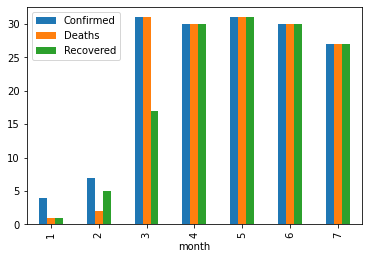

In [12]:
#Was the average number of daily new deaths higher in March or April in US?
data_in_US.groupby('month')[['Confirmed', 'Deaths', 'Recovered']].nunique().plot(kind='bar')


In [13]:
data_in_finland= df1[df1.CountryRegion=='Finland']
data_in_finland

general_situation_in_Fin= data_in_finland[['Confirmed', 'Deaths', 'Recovered']
                                      ].groupby(data_in_finland['month']).sum()
general_situation_in_Fin

,Confirmed,Deaths,Recovered
month,,,
1,3,0,0
2,34,0,18
3,13382,69,184
4,99473,2863,37610
5,190615,8784,138200
6,212396,9750,184300
7,197264,8872,184180


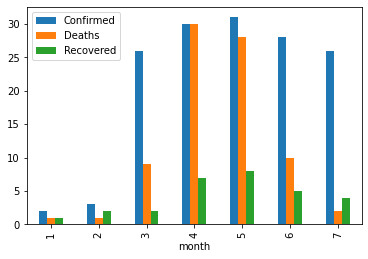

In [14]:
data_in_finland.groupby('month')[['Confirmed', 'Deaths', 'Recovered']].nunique().plot(kind='bar')

As we can see, until July, the confirmed cases has been declined a bit, but still a lot higher than the recovered case

Now i want to map the regions has the covid

In [15]:
geodata= gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
del geodata['pop_est']
del geodata ['iso_a3']
del geodata ['continent']
del geodata['gdp_md_est']
geodata= geodata.rename(columns={'name': 'CountryRegion'})
geodata

,CountryRegion,geometry
0,Fiji,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Tanzania,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,W. Sahara,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...
172,Serbia,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,Montenegro,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,Kosovo,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,Trinidad and Tobago,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [16]:
#map_country=geodata.set_index('CountryRegion').T.to_dict()
map_country= dict(geodata.values)
df1['geometry']= df1['CountryRegion'].map(map_country)
df1 = df1.dropna(how='any',axis=0)
#df1['geometry']=df1['geometry'].astype('geometry')
df1

,Date,CountryRegion,Confirmed,Deaths,Recovered,Active,New_cases,New_deaths,New_recovered,WHO_Region,year,month,day,geometry
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean,2020,1,22,"POLYGON ((66.51860680528867 37.36278432875879,..."
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe,2020,1,22,"POLYGON ((21.0200403174764 40.84272695572588, ..."
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa,2020,1,22,POLYGON ((-8.684399786809053 27.39574412689601...
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa,2020,1,22,(POLYGON ((12.99551720546518 -4.78110320396188...
6,2020-01-22,Argentina,0,0,0,0,0,0,0,Americas,2020,1,22,(POLYGON ((-68.63401022758323 -52.636370458874...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35149,2020-07-27,Venezuela,15988,146,9959,5883,525,4,213,Americas,2020,7,27,POLYGON ((-60.73357418480372 5.200277207861901...
35150,2020-07-27,Vietnam,431,0,365,66,11,0,0,Western Pacific,2020,7,27,"POLYGON ((104.3343347514035 10.48654368737523,..."
35153,2020-07-27,Yemen,1691,483,833,375,10,4,36,Eastern Mediterranean,2020,7,27,"POLYGON ((52.00000980002224 19.00000336351606,..."
35154,2020-07-27,Zambia,4552,140,2815,1597,71,1,465,Africa,2020,7,27,"POLYGON ((30.7400097314221 -8.340005930353721,..."


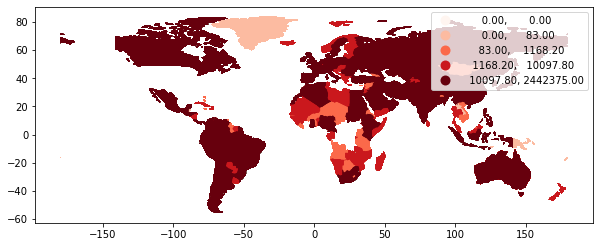

In [17]:
import matplotlib.pyplot as plt
from geopandas import GeoDataFrame
df1 =GeoDataFrame(df1)

fig, ax = plt.subplots(1, figsize=(10, 8))
df1.plot(column='Confirmed', ax = ax, scheme="quantiles", cmap="Reds", legend=True)


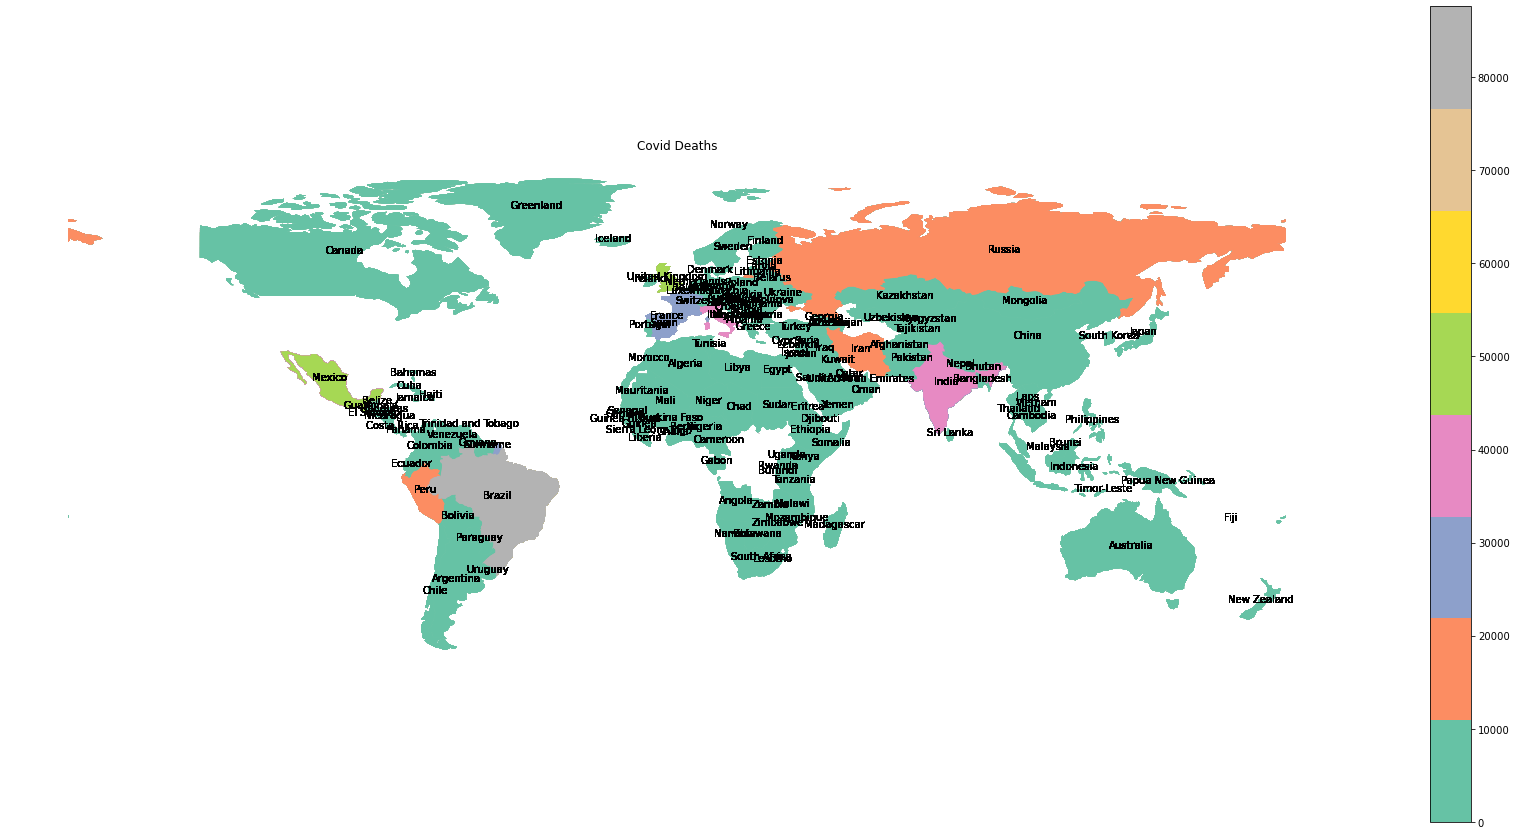

In [18]:
fig,ax = plt.subplots(1,1, figsize=(30,15))
df1.plot(column='Deaths', cmap='Set2', alpha=1, linewidth=0.02, edgecolor='0.8', ax=ax, legend=True)
df1.apply(lambda x:ax.annotate(s=x.CountryRegion, color='black',xy=x.geometry.centroid.coords[0],ha='center'), axis=1)

plt.title('Covid Deaths')
plt.axis('off')
plt.show()

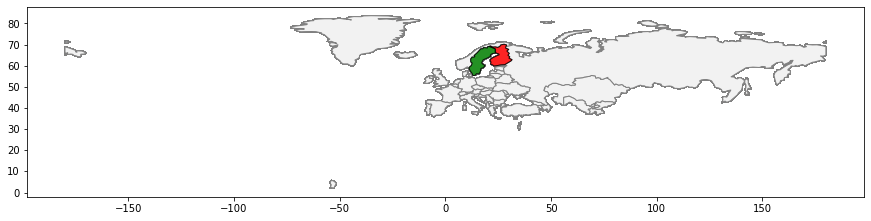

In [19]:
from descartes import PolygonPatch
def plotCountryPatch( axes, country_name, fcolor ):
    # plot a country on the provided axes
    nami = df1[df1.CountryRegion == country_name]
    namigm = nami.__geo_interface__['features']  # geopandas's geo_interface
    namig0 = {'type': namigm[0]['geometry']['type'], \
              'coordinates': namigm[0]['geometry']['coordinates']}
    axes.add_patch(PolygonPatch( namig0, fc=fcolor, ec="black", alpha=0.85, zorder=2 ))
ax2 = df1[df1.WHO_Region=='Europe'].plot(figsize=(15,8), edgecolor=u'gray', cmap='Pastel1')
plotCountryPatch(ax2, 'Finland', 'red')
plotCountryPatch(ax2, 'Sweden', 'green')
plt.show()


I will have to analyze a dataset (AB NYC 2019.csv) that we worked with in the lecture. The data includes information about hosts, geographical availability, and dif- ferent metrics available from Airbnb places in New York City (https://www.kaggle.com/dgomonov/ new-york-city-airbnb-open-data). 
** You need to write the code to answer the following questions to understand the data further.

** It is an important task to understand the difference between different neighbourhood groups. In order to do this, identify the neighbourhood group with (i) the highest average price, and (ii) the highest total number of reviews.

** Next, analyse the data from the perspective of room type and identify which room type has (i) the highest average price, and (ii) the highest average number of reviews.


In [20]:
# First we load the csv  file under the name AB_NYC 2019.CSV
df2=pd.read_csv('AB_NYC_2019.csv', index_col=0)
df2

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27


In [21]:
# I  want to understand which type of information in each column before writing function.
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 2539 to 36487245
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            48879 non-null  object 
 1   host_id                         48895 non-null  int64  
 2   host_name                       48874 non-null  object 
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  last_review                     38843 non-null  object 
 12  reviews_per_month         

In [22]:
df2.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# It is an important task to understand the difference between different neighbourhood groups. In order to do this, identify the neighbourhood group with (i) the highest average price, and (ii) the highest total number of reviews.

#identify the neighbourhood group with (i) the highest average price

In [23]:
#I create the new dataframe for The Neighbourhood group, price and number of reviews

group_price_reviews=df2[['neighbourhood_group','price', 'number_of_reviews']]

group_price_reviews

,neighbourhood_group,price,number_of_reviews
id,,,
2539,Brooklyn,149,9
2595,Manhattan,225,45
3647,Manhattan,150,0
3831,Brooklyn,89,270
5022,Manhattan,80,9
...,...,...,...
36484665,Brooklyn,70,0
36485057,Brooklyn,40,0
36485431,Manhattan,115,0


In [24]:
# Find the average price of the neighbourhood group 

#Grouping the price column according to its neighbourhood group

price_group= group_price_reviews[['price' ]].groupby(df2['neighbourhood_group'])
price_group

In [25]:
# Average price of each neighbour hood group:
average_price=pd.DataFrame(price_group['price'].mean())
average_price


,price
neighbourhood_group,
Bronx,87.496792
Brooklyn,124.383207
Manhattan,196.875814
Queens,99.517649
Staten Island,114.812332


In [26]:
# Find the highest price value among the average price group in dataframe
max_average_price= average_price.max()

max_average_price


price    196.875814
dtype: float64

In [27]:
# the specific neigbbourhood group with the highest average price:
average_price.loc[average_price.isin([max_average_price]).any(axis=1)]

,price
neighbourhood_group,
Manhattan,196.875814


 #Identify the neighbourhood group with (ii) the highest total number of reviews.

In [28]:
# Identify the neighbourhood group with (ii) the highest total number of reviews.
    
# Similarly, I groupby the columns number_of_reviews with neighbourhood_group

review_group= group_price_reviews[['number_of_reviews']].groupby(group_price_reviews['neighbourhood_group'])
review_group

In [29]:
# Find the total number of reviews according to neigbourhood_group
total_of_reviews= review_group.sum()
total_of_reviews

,number_of_reviews
neighbourhood_group,
Bronx,28371
Brooklyn,486574
Manhattan,454569
Queens,156950
Staten Island,11541


Identify highest value of number_of_reviews according to neighbourhood_group

In [30]:
# Identify highest value of number_of_reviews according to neighbourhood_group

max_review=total_of_reviews['number_of_reviews'].max()

print('Highest number of review is', max_review)

Highest number of review is 486574


In [31]:
# Neighbourhood group having most of reviews

total_of_reviews.loc[total_of_reviews.isin([max_review]).any(axis=1)]

,number_of_reviews
neighbourhood_group,
Brooklyn,486574


# Next, analyse the data from the perspective of room type and identify which room type has (i) the highest average price, and (ii) the highest average number of reviews.

In [32]:
df2.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [33]:
# I create the dataframe with room_type, price and number of reviews:

room_price_review=df2[['room_type', 'price', 'number_of_reviews']]

room_price_review

,room_type,price,number_of_reviews
id,,,
2539,Private room,149,9
2595,Entire home/apt,225,45
3647,Private room,150,0
3831,Entire home/apt,89,270
5022,Entire home/apt,80,9
...,...,...,...
36484665,Private room,70,0
36485057,Private room,40,0
36485431,Entire home/apt,115,0


In [34]:
# I want to see which type of data of room_price_review, ie integrers or string
room_price_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 2539 to 36487245
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   room_type          48895 non-null  object
 1   price              48895 non-null  int64 
 2   number_of_reviews  48895 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


Identify which room type has (i) the highest average price

In [35]:
#identify which room type has (i) the highest average price

#First, I find the average prove for each room type by using groupby
room_average_price=pd.DataFrame(room_price_review[['price']].groupby(room_price_review['room_type']).mean())

room_average_price


,price
room_type,
Entire home/apt,211.794246
Private room,89.780973
Shared room,70.127586


In [36]:
# Finding the highest average price:

highest_avg_room_price=room_average_price['price'].max()

print('highest average price of room is:', highest_avg_room_price)

highest average price of room is: 211.79424613325986


In [37]:
# I locate which room_type has the highest average price
room_average_price.loc[room_average_price.isin([highest_avg_room_price]).any(axis=1)]

,price
room_type,
Entire home/apt,211.794246


Identify which room type has (ii) the highest average number of reviews.

In [38]:
## identify which room type has (ii) the highest average number of reviews.
# First, I will groupby the number_of_reviews and room_type 
# and then find the average number of review of each room_type

# Groupby the number_of_reviews and 
avg_no_review= room_price_review[['number_of_reviews']].groupby(room_price_review['room_type']).mean()
avg_no_review

,number_of_reviews
room_type,
Entire home/apt,22.842418
Private room,24.112962
Shared room,16.600000


In [39]:
# Find the highest average number of reviews of categorical column: room_type

highest_avg_no_review= avg_no_review.number_of_reviews.max()

print('Highest average number of reviews is: ', highest_avg_no_review)

Highest average number of reviews is:  24.112962465287108


In [40]:
# I locate which room_type has the highest average number of review:
avg_no_review.loc[avg_no_review.isin([highest_avg_no_review]). any(axis=1)]

## So the Private room has the highest average number of review

,number_of_reviews
room_type,
Private room,24.112962


I will have to work with a telecom churn dataset (churn-bigml-80.csv). The data includes information of customer activity data (features), along with a churn label specifying whether a customer canceled the subscription (more information at https://www.kaggle.com/mnassrib/ telecom-churn-datasets?select=churn-bigml-80.csv). You need to write the code to answer the following questions.

• Focusing on day, eve and night calls as considered in the data, which part of the day has the highest total number of calls? Is the part of day with the highest total charge is the same?

• What is the maximum amount of customer service calls that appear in the dataset, and how many individual customers had exactly that number of service calls?

• Choose one categorical column which has less than 5 possible values, and add new dummy columns to the dataset for the selected column.

In [41]:
# Load the dataset from csv file: churn-bigml-80.csv
df3=pd.read_csv('churn-bigml-80.csv', index_col=0)
df3

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
State,,,,,,,,,,,,,,,,,,,
KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False


In [42]:
# I want to check if the dataset has missing values
df3.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [43]:
# I want to learn which type of data in each columns
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2666 entries, KS to TN
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          2666 non-null   int64  
 1   Area code               2666 non-null   int64  
 2   International plan      2666 non-null   object 
 3   Voice mail plan         2666 non-null   object 
 4   Number vmail messages   2666 non-null   int64  
 5   Total day minutes       2666 non-null   float64
 6   Total day calls         2666 non-null   int64  
 7   Total day charge        2666 non-null   float64
 8   Total eve minutes       2666 non-null   float64
 9   Total eve calls         2666 non-null   int64  
 10  Total eve charge        2666 non-null   float64
 11  Total night minutes     2666 non-null   float64
 12  Total night calls       2666 non-null   int64  
 13  Total night charge      2666 non-null   float64
 14  Total intl minutes      2666 non-null   float6

# Focusing on day, eve and night calls as considered in the data, which part of the day has the highest total number of calls? Is the part of day with the highest total charge is the same?

Which part of the day has the highest total number of calls

In [44]:
# I create the new dataframe with columns having number of calls:
calls= df3[['Total day calls', 'Total night calls', 'Total eve calls']].sum()
calls

Total day calls      267427
Total night calls    266883
Total eve calls      266663
dtype: int64

In [45]:
# Before finding the highest total number of calls, 
# I will find out the total number of calls according to specofic part of a day
number_of_day_calls= calls['Total day calls'].sum()
print('total number of day calls is:', number_of_day_calls)
#
number_of_eve_calls= calls['Total eve calls'].sum()
print('total number of eve calls is:', number_of_eve_calls)
#
number_of_night_calls=calls['Total night calls'].sum()
print('total number of night calls is:', number_of_night_calls)

# I create a new data frame total_calls to visualize the total number of calls in a day
total_calls=pd.DataFrame([number_of_day_calls, number_of_night_calls, number_of_eve_calls], 
                         index=['day', 'night', 'eve'], columns=['Total number of calls'])

total_calls

total number of day calls is: 267427
total number of eve calls is: 266663
total number of night calls is: 266883


,Total number of calls
day,267427
night,266883
eve,266663


In [46]:
# based on the dataframe total_calls, I will find out the highest values of total number of calls

peak_number_of_calls=total_calls['Total number of calls'].max()

print('the highest total number of calls is:', peak_number_of_calls)

# Based on the highest total number of call, I will locate which part of the day that value belong to
# That is also the part of the day having highest total number of calls
part_of_the_day_with_highest_calls=total_calls.loc[total_calls.isin([peak_number_of_calls]).any(axis=1)]
part_of_the_day_with_highest_calls




the highest total number of calls is: 267427


,Total number of calls
day,267427


# Is the part of day with the highest total charge is the same?

In [47]:
# I create the dataframe with total charge for day, night and eve

charge=df3[['Total day charge', 'Total night charge', 'Total eve charge']]
charge

,Total day charge,Total night charge,Total eve charge
State,,,
KS,45.07,11.01,16.78
OH,27.47,11.45,16.62
NJ,41.38,7.32,10.30
OH,50.90,8.86,5.26
OK,28.34,8.41,12.61
...,...,...,...
SC,22.90,9.96,16.12
AZ,26.55,12.56,18.32
WV,39.29,8.61,13.04


In [48]:
# Similarly I will find the total charge in specific parts of a day
day_charge=charge['Total day charge'].sum()
print('total day charge is:', day_charge)
night_charge= charge['Total night charge'].sum()
print('total night charge is:', night_charge)
eve_charge= charge['Total eve charge'].sum()
print('total eve charge is:', eve_charge)

total day charge is: 81346.07
total night charge is: 24134.47
total eve charge is: 45410.17


In [49]:
# I create the dataframe total_charge indicating the values of total charge in each part of the day
total_charge=pd.DataFrame([day_charge, night_charge, eve_charge], index=['day', 'night', 'eve'], 
                          columns=['Total number of charge'])
total_charge

,Total number of charge
day,81346.07
night,24134.47
eve,45410.17


In [50]:
# Finding the maximum values of total_charge
peak_charge= total_charge.max()
peak_charge

Total number of charge    81346.07
dtype: float64

In [51]:
# Lastly, I will locate the peak_charge value in the dataframe
# As we can see, the part of the day having the highest total charges is day time. 
part_of_the_day_with_highest_charge=total_charge.loc[total_charge.isin([peak_charge]).any(axis=1)]
part_of_the_day_with_highest_charge

,Total number of charge
day,81346.07


In [52]:
# As both highest total number of calls and total charge belong to day time, 
# I will concat each other as a conclusion

pd.concat([part_of_the_day_with_highest_charge, part_of_the_day_with_highest_calls], axis=1)

,Total number of charge,Total number of calls
day,81346.07,267427


# • What is the maximum amount of customer service calls that appear in the dataset, and how many individual customers had exactly that number of service calls?

#What is the maximum amount of customer service calls that appear in the dataset

In [53]:
#What is the maximum amount of customer service calls that appear in the dataset

maximum_no_of_services_call= df3['Customer service calls'].max()

print('maximum amount of customer service calls is:', maximum_no_of_services_call)

maximum amount of customer service calls is: 9


In [54]:
#and how many individual customers had exactly that number of service calls?

customer_having_exact_number_of_service_calls=df3[df3['Customer service calls']==9]

customer_having_exact_number_of_service_calls

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
State,,,,,,,,,,,,,,,,,,,
MN,152,415,Yes,Yes,20,237.5,120,40.38,253.4,94,21.54,265.2,80,11.93,14.2,3,3.83,9,True
NJ,53,408,No,No,0,228.6,117,38.86,132.8,123,11.29,227.2,124,10.22,10.1,2,2.73,9,True


In [55]:
# Number of people having that exact number of service calls (maximum number of calls=9)
total_of_people_having_maximum_service_calls=pd.DataFrame(customer_having_exact_number_of_service_calls
                                                          [['Customer service calls']])

total_of_people_having_maximum_service_calls

,Customer service calls
State,
MN,9
NJ,9


# • Choose one categorical column which has less than 5 possible values, and add new dummy columns to the dataset for the selected column.

In [56]:
df3.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
State,,,,,,,,,,,,,,,,,,,
KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [57]:
# First I need to check the type of data in each column
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2666 entries, KS to TN
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          2666 non-null   int64  
 1   Area code               2666 non-null   int64  
 2   International plan      2666 non-null   object 
 3   Voice mail plan         2666 non-null   object 
 4   Number vmail messages   2666 non-null   int64  
 5   Total day minutes       2666 non-null   float64
 6   Total day calls         2666 non-null   int64  
 7   Total day charge        2666 non-null   float64
 8   Total eve minutes       2666 non-null   float64
 9   Total eve calls         2666 non-null   int64  
 10  Total eve charge        2666 non-null   float64
 11  Total night minutes     2666 non-null   float64
 12  Total night calls       2666 non-null   int64  
 13  Total night charge      2666 non-null   float64
 14  Total intl minutes      2666 non-null   float6

In [58]:
# I choose the Voice mail plan column as categorical data and only less than 5 possible values
less_than_5_values= df3[['Voice mail plan']].iloc[0:4]
less_than_5_values

,Voice mail plan
State,
KS,Yes
OH,Yes
NJ,No
OH,No


In [59]:
# Turn the chosen column to the dummies column
dummies=pd.get_dummies(less_than_5_values['Voice mail plan'])
dummies

,No,Yes
State,,
KS,0,1
OH,0,1
NJ,1,0
OH,1,0


In [60]:
#add new dummy columns to the dataset for the selected column
pd.concat([less_than_5_values, dummies], axis=1)

,Voice mail plan,No,Yes
State,,,
KS,Yes,0,1
OH,Yes,0,1
NJ,No,1,0
OH,No,1,0


In [61]:
# Or with combine_first
less_than_5_values.combine_first(dummies)

,No,Voice mail plan,Yes
State,,,
KS,0.0,Yes,1.0
OH,0.0,Yes,1.0
NJ,1.0,No,0.0
OH,1.0,No,0.0


# • Create a new column as the sum of the total day, eve and night call columns. Considering this new total daily call value, who had in average higher number of calls: customers with or without international plan?

In [62]:
df3.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
State,,,,,,,,,,,,,,,,,,,
KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [63]:
plan= pd.get_dummies(df3['International plan'])
plan

,No,Yes
State,,
KS,1,0
OH,1,0
NJ,1,0
OH,0,1
OK,0,1
...,...,...
SC,1,0
AZ,1,0
WV,1,0


In [64]:
 df3[['Total day calls', 'Total night calls', 'Total night calls']].sum()

Total day calls      267427
Total night calls    266883
Total night calls    266883
dtype: int64

In [65]:
df3['Total_of_calls']= df3['Total day calls'] + df3['Total night calls'] +df3['Total eve calls']
df3


,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total_of_calls
State,,,,,,,,,,,,,,,,,,,,
KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,300
OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,329
NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,328
OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,248
OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False,294
AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False,286
WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False,235


In [66]:
df3['Total_of_calls'].groupby(df3['International plan']).mean()

International plan
No     300.281302
Yes    301.848148
Name: Total_of_calls, dtype: float64